In [7]:
from tensorflow.keras.datasets.mnist import load_data
(x_train, y_train), (x_test, y_test) = load_data()
x_train.shape

(60000, 28, 28)

In [8]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1).astype('float32')
x_test.shape

(10000, 28, 28, 1)

In [9]:
from tensorflow.keras.utils import to_categorical
number_of_classes = 10
y_train = to_categorical(y_train, number_of_classes)
y_test = to_categorical(y_test, number_of_classes)

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2], 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=64, kernel_size=3, activation='sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(number_of_classes, activation='softmax'))

In [55]:
model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])

In [56]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 37s 19ms/step - loss: 0.5571 - accuracy: 0.8190 - val_loss: 0.0988 - val_accuracy: 0.9698
Epoch 2/4
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2138 - accuracy: 0.9373 - val_loss: 0.0690 - val_accuracy: 0.9769
Epoch 3/4
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1695 - accuracy: 0.9521 - val_loss: 0.0541 - val_accuracy: 0.9825
Epoch 4/4
1875/1875 [==============================] - 31s 17ms/step - loss: 0.1365 - accuracy: 0.9616 - val_loss: 0.0463 - val_accuracy: 0.9841


In [39]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0485 - accuracy: 0.9851


[0.048454560339450836, 0.9850999712944031]

In [40]:
y_pred = model.predict(x_test)
y_pred.shape

(10000, 10)

In [41]:
import tensorflow as tf
confusion_matrix = tf.math.confusion_matrix(labels=y_test.argmax(axis=1), predictions=y_pred.argmax(axis=1))
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    2,    0,    1,    1,    5,    1,    1,    0],
       [   0, 1125,    3,    4,    1,    0,    2,    0,    0,    0],
       [   0,    1, 1026,    2,    0,    0,    0,    2,    1,    0],
       [   0,    0,    3,  999,    0,    5,    0,    2,    1,    0],
       [   0,    0,    1,    0,  965,    0,    5,    2,    0,    9],
       [   1,    0,    0,    5,    0,  883,    1,    1,    0,    1],
       [   1,    2,    0,    0,    2,    4,  949,    0,    0,    0],
       [   0,    3,   13,    5,    0,    0,    0, 1003,    0,    4],
       [   1,    1,    5,    2,    3,    5,    6,    3,  943,    5],
       [   2,    1,    0,    1,    5,    2,    1,    5,    3,  989]])>

Text(69.0, 0.5, 'Truth')

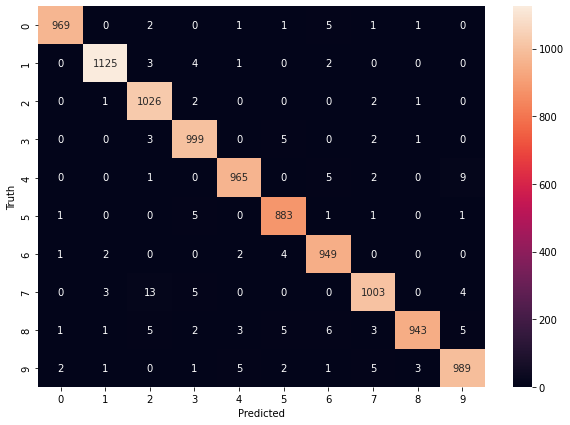

In [42]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10, 7))
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

[[1.2165215e-10 1.9962288e-06 3.0087269e-06 2.8718716e-07 8.7975037e-01
  5.8375772e-08 4.6787205e-09 1.4324480e-04 1.8707711e-04 1.1991397e-01]]
4


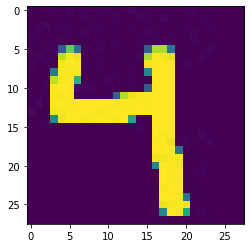

In [64]:
import cv2
img = cv2.imread("image.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2arr = img.reshape(1, 28, 28, 1)
y_pred = model.predict(img2arr)
print(y_pred)
print(y_pred.argmax())
plt.imshow(img)
plt.show()